# MALL CUSTOMERS CLUSTERING 
### PREPARED BY: IMEN CHERIF

This dataset contains information about the customers of a particular mall, namely their ages, genders, annual income, and spending scores.<br>
Our objective is to divide these customers into different clusters with similar characteristics. <br>
Firstly, we will look into the division according to the annual income and spending score. Then, we will see the grouping according to the ages and spending scores. <br>
Source: https://www.kaggle.com/datasets/shwetabh123/mall-customers?datasetId=7721

#### 1. Data Preprocessing:

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [58]:
# Load the customer data
df = pd.read_csv('Mall_Customers.csv')

In [59]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
df.duplicated().sum()

0

As stated, we do not have any missing values in our dataset. Neither do we have duplicates. <br>
Therefore, we can proceed to our data analysis and then move to the implementation of our unsupervised learning technique.

In [62]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


This table sums up the major characteristics of our customers. In fact, the average age of the mall's vistors falls around 39 years old. Meanwhile, their average annual income is 60.56k$ with a range between 26.26 and 137k$. <br>

#### 2. K-Means Clustering according to the Annual Income and Spending Score:

In [63]:
x = df.iloc[:, [3,4]].values

In [64]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters =i , init ="k-means++", random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


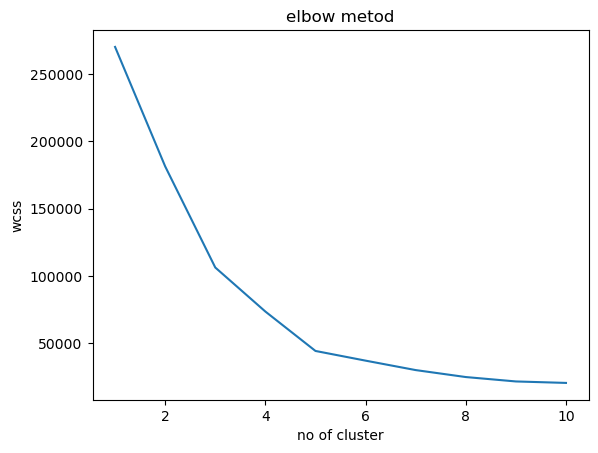

In [65]:
plt.plot(range(1,11), wcss)
plt.title("elbow metod")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

Following the elbow method, we can see that the best value of k (number of clusters) is 5. <br>
The following code, therefore, corresponds to a number of clusters equal to 5.

In [66]:
kmeansmodel = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

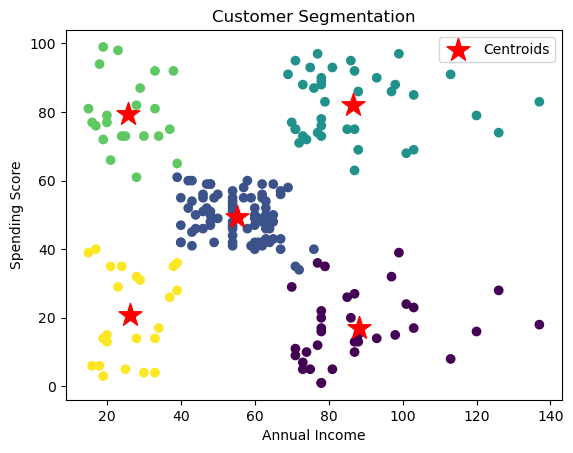

In [67]:
# Assign cluster labels to the data points
labels = kmeansmodel.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


The graph shows that the customers can be divided into 5 clusters according to the relationship between their annual income and spending score. <br>
The purple cluster, for example, represents customers with a high annual income and low spending score, while the green one is for the group that has a high spending score despite their limited income.

#### 3. K-Means Clustering According to Customers' Age and Spending Score:

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


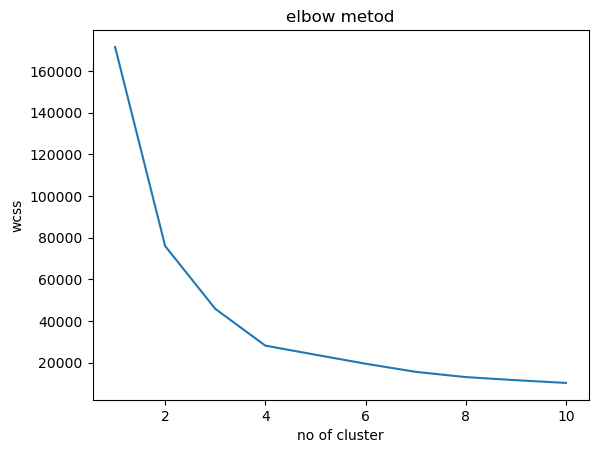

In [68]:
x = df.iloc[:, [2,4]].values
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters =i , init ="k-means++", random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("elbow metod")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

This time, when clustering the customers according to their age in relation to their spending score, we will work with 4 different clusters.

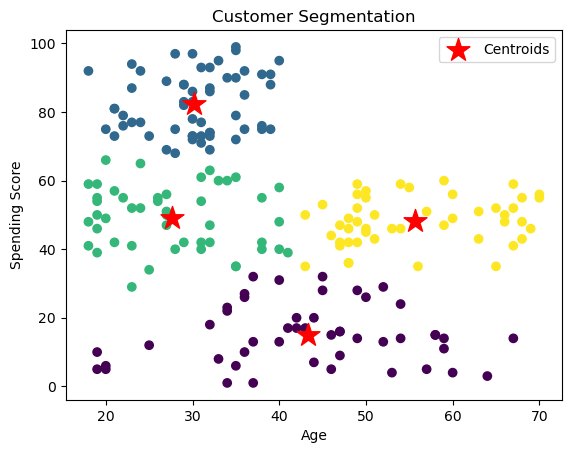

In [73]:
kmeansmodel = KMeans(n_clusters=4, init="k-means++", n_init=20, random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

# Assign cluster labels to the data points
labels = kmeansmodel.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


Here, we increased the n_init parameter to a higher value, such as 20, in order to improve the chances of obtaining the desired number of clusters, in this case 4. <br> 
The red stars represent the centroids of our four clusters. We can see that a low spending score is very weakly correlated with the age, as customers of all ages may be spending small amounts of money, but we can notice that the highest paying customers are the ones from ages 20 to 40 in general.

#### 4. Conclusion:
It may be more informative to cluster our sample according to their annual income in relation to their spending score, since we can draw more conclusions from the graph than when we look into our age-spending score scatterplot.